# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
library(ggplot2)
bcscRiskFactors<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
#head(bcscRiskFactors)
#tail(bcscRiskFactors)

In [2]:
#str(bcscRiskFactors)   # 1144564 observations of 13 variables

In [3]:
# Replicamos las filas indicadas por la columna count
bcscRiskFactorsReplicate <- bcscRiskFactors[rep(seq_len(dim(bcscRiskFactors)[1]), bcscRiskFactors$count), ]
#rownames(bcscRiskFactorsReplicate) <- seq_len(dim(bcscRiskFactorsReplicate)[1])

In [4]:
#str(bcscRiskFactorsReplicate)   # 6318638  observations of 13 variables

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [5]:
#Definimos una semilla común para todos:
set.seed(12345)

In [6]:
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
N <- 5000
indices <- sample(1:nrow(bcscRiskFactorsReplicate), N, replace = F)
bcsc <- bcscRiskFactorsReplicate[indices,]
#head(bcsc)

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [7]:
# Codificacion: 9 = Desconocido
colsDesconocidoNAFormat = c("race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")
bcsc[, colsDesconocidoNAFormat][bcsc[, colsDesconocidoNAFormat] == 9] <- NA

In [8]:
# Factor format: age_group_5_years
bcsc$age_group_5_years <- factor(bcsc$age_group_5_years, 
    levels=c(1,2,3,4,5,6,7,8,9,10,11,12,13),
    labels=c('Edad 18-29','Edad 30-34','Edad 35-39','Edad 40-44','Edad 45-49','Edad 50-54','Edad 55-59','Edad 60-64','Edad 65-69','Edad 70-74','Edad 75-79','Edad 80-84','Edad >= 85'))

In [9]:
# Factor format: race_eth
bcsc$race_eth <- factor(bcsc$race_eth,
    levels=c(1,2,3,4,5,6),
    labels=c('Non-Hispanic white','Non-Hispanic black','Asian/Pacific Islander','Native American','Hispanic','Other/mixed'))

In [10]:
# Factor format: first_degree_hx
bcsc$first_degree_hx <- factor(bcsc$first_degree_hx, 
    levels=c(0,1),
    labels=c('No','Sí'))

In [ ]:
# Factor format: 
#bcsc$age_menarche <- factor(bcsc$age_menarche, 
#    levels=c(0,1,2),
#    labels=c('Edad ≥14','Edad 12-13','Edad <12'))

In [ ]:
# Factor format: 
#bcsc$age_first_birth <- factor(bcsc$age_first_birth, 
#    levels=c(0,1,2,3,4),
#    labels=c('Edad < 20','Edad 20-24','Edad 25-29','Edad ≥30','Nulliparous'))

In [11]:
# Factor format: BIRADS_breast_density
bcsc$BIRADS_breast_density <- factor(bcsc$BIRADS_breast_density, 
    levels=c(1,2,3,4),
    labels=c('Almost entirely fat','Scattered fibroglandular densities','Heterogeneously dense','Extremely dense'))

In [ ]:
# Factor format: 
#bcsc$current_hrt <- factor(bcsc$current_hrt, 
#    levels=c(0,1),
#    labels=c('No','Sí'))

In [ ]:
# Factor format: 
#bcsc$menopaus <- factor(bcsc$menopaus, 
#    levels=c(1,2,3),
#    labels=c('Pre- or peri-menopausal','Post-menopausal','Surgical menopause'))

In [ ]:
# Factor format: 
#bcsc$bmi_group <- factor(bcsc$bmi_group, 
#    levels=c(1,2,3,4),
#    labels=c('10-24.99','25-29.99','30-34.99','35 or more'))

In [ ]:
# Factor format: 
#bcsc$biophx <- factor(bcsc$biophx, 
#    levels=c(0,1),
#    labels=c('No','Sí'))

In [ ]:
# Factor format: 
#bcsc$breast_cancer_history <- factor(bcsc$breast_cancer_history, 
#    levels=c(0,1),
#    labels=c('No','Sí'))

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [12]:
ageMean <- c(23,32,37,42,47,52,57,62,67,72,77,82,87)
bcsc$age_estimated <- ageMean[as.numeric(bcsc$age_group_5_years)]

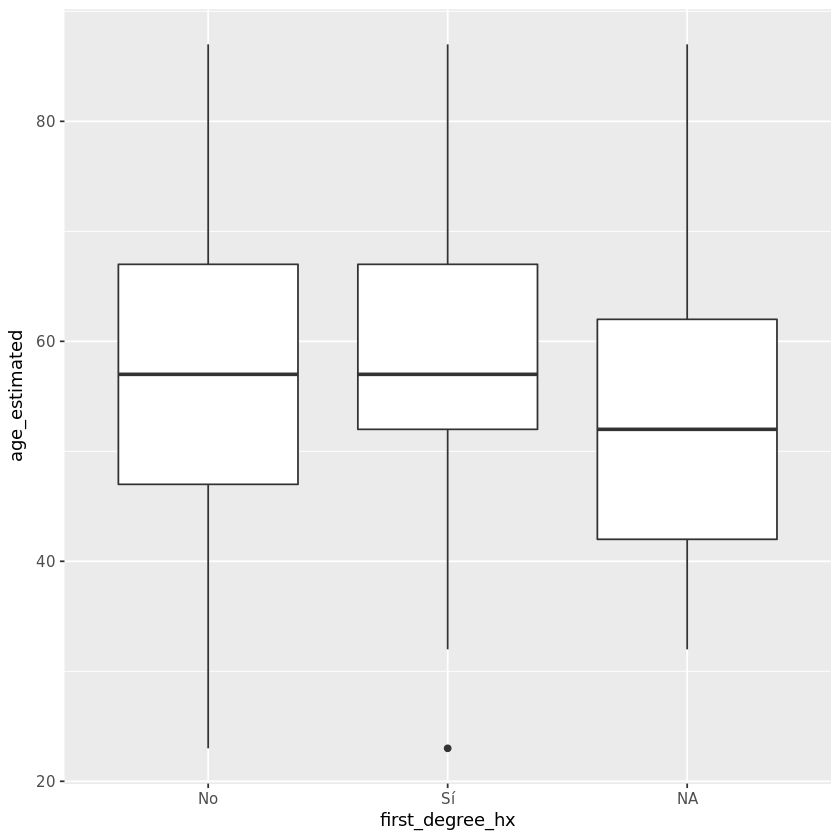

In [13]:
ggplot(data=bcsc, aes(x=first_degree_hx,y=age_estimated)) + geom_boxplot()
#boxplot(data=bcsc, age_estimated~first_degree_hx)

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [14]:
paste("La edad estimada para pacientes CON antecedentes familiares no siguen una distribución gaussiana. pvalor:",
          shapiro.test(bcsc$age_estimated[bcsc$first_degree_hx=="Sí"])$p.value)
paste("La edad estimada para pacientes SIN antecedentes familiares no siguen una distribución gaussiana. pvalor:",
          shapiro.test(bcsc$age_estimated[bcsc$first_degree_hx=="No"])$p.value)

[1] "La edad estimada para pacientes CON antecedentes familiares no siguen una distribución gaussiana. pvalor: 4.80453766197751e-11"

[1] "La edad estimada para pacientes SIN antecedentes familiares no siguen una distribución gaussiana. pvalor: 5.13942109457951e-31"

La edad de aparición del cancer y la existencia de antecedentes familiares no muestran una distribución gaussiana por lo que  aplicamos el Test de Wilcoxon-Mann-Whitney para comprobar diferencias estadísticas entre ellas:

Antes observamos que tienen varianzas distintas:

In [15]:
var.test(bcsc$first_degree_hx, bcsc$age_estimated)

Warning message in var(x):
“Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.”


	F test to compare two variances

data:  bcsc$first_degree_hx and bcsc$age_estimated
F = 0.00092091, num df = 4510, denom df = 4999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0008699841 0.0009749030
sample estimates:
ratio of variances 
      0.0009209117 


In [16]:
wilcox.test(age_estimated ~ first_degree_hx, data=bcsc)


	Wilcoxon rank sum test with continuity correction

data:  age_estimated by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


La hipótesis nula es que ambas distribuciones son iguales, dado que el valor de  p-value es muy bajo (2.339e-06) se rechaza la hipótesis nula y por tanto podemos asumir que la edad de aparición del cancer es dependiente de que existan antecedentes familiares.

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

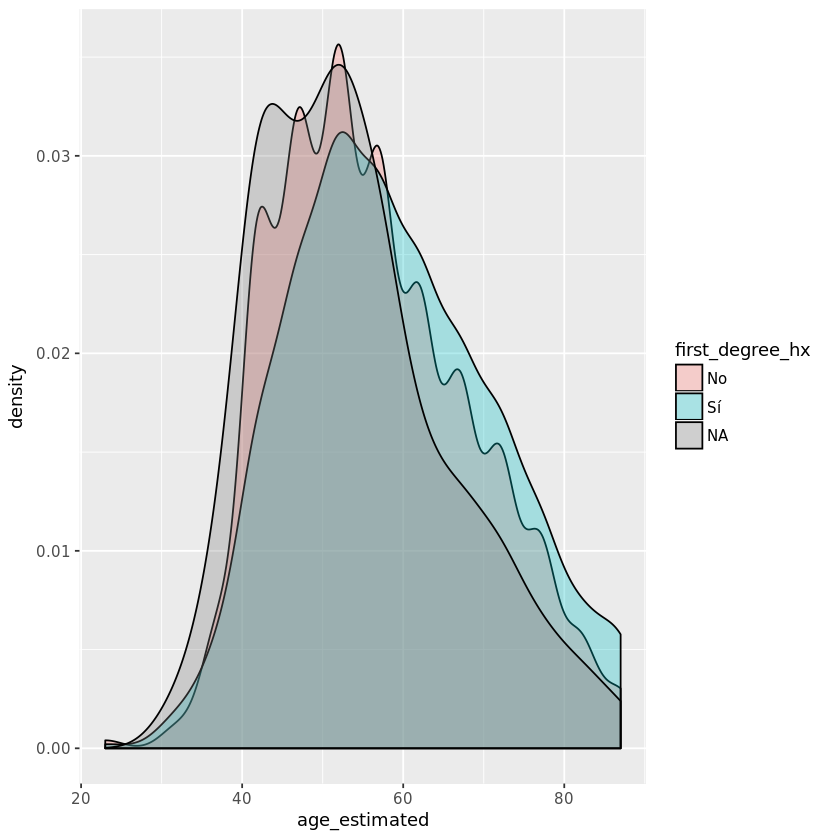

In [17]:
ggplot(data=bcsc, aes(x=age_estimated,fill=first_degree_hx)) + geom_density(alpha = 0.3)

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

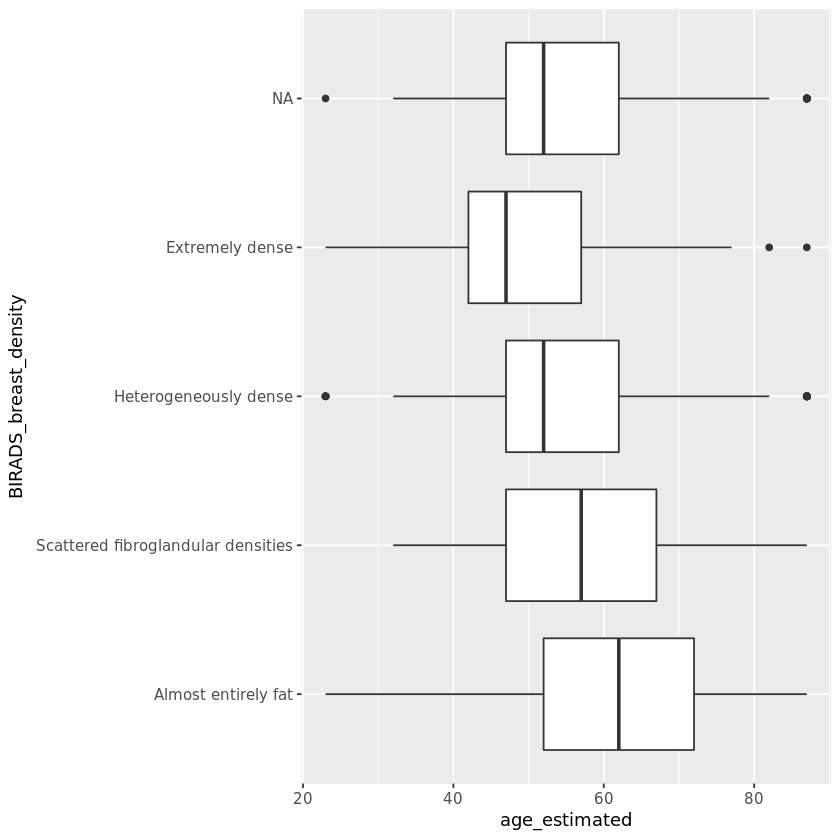

In [18]:
ggplot(data=bcsc, aes(x=BIRADS_breast_density,y=age_estimated)) + geom_boxplot() + coord_flip()
#boxplot(data=bcsc, age_estimated~BIRADS_breast_density)

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [19]:
M <- table(bcsc$BIRADS_breast_density, bcsc$age_estimated)
M
cqt<-chisq.test(M,simulate.p.value = TRUE)
cqt

                                    
                                      23  32  37  42  47  52  57  62  67  72
  Almost entirely fat                  1   3   4  19  29  48  44  39  35  38
  Scattered fibroglandular densities   0   6  36 177 204 268 261 186 170 161
  Heterogeneously dense                5  13  54 225 240 242 196 157 123  81
  Extremely dense                      2   1  15  54  58  50  35  19   8   6
                                    
                                      77  82  87
  Almost entirely fat                 20   8   9
  Scattered fibroglandular densities 100  63  33
  Heterogeneously dense               54  36  25
  Extremely dense                      6   1   1


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  M
X-squared = 182.5, df = NA, p-value = 0.0004998


Que se detecte el cancer a una edad determinada no se puede relacionar con el tipo de cancer que padece la mujer.

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

Realizamos un test de homogeneidad mediante la aplicación del Test chi cuadrado de Pearson

In [20]:
#Test chi cuadrado 
observed <- table(bcsc$BIRADS_breast_density)   # table(as.numeric(bcsc$BIRADS_breast_density))
cqt <- chisq.test(observed)
cqt


	Chi-squared test for given probabilities

data:  observed
X-squared = 1816.3, df = 3, p-value < 2.2e-16


In [21]:
#Test Fisher
M <- matrix(observed,ncol=2)
fisher.test(M)


	Fisher's Exact Test for Count Data

data:  M
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.02615158 0.03789311
sample estimates:
odds ratio 
0.03152222 


El test chi cuadrado nos indica que los distintos tipos de cancer (BIRADs) tienen distintas probabilidades de aparecer.
Para verificarlo se ha realizado también el test de Fisher con mismo resultado.

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [22]:
#M <- table(bcsc$BIRADS_breast_density)
M <- xtabs(~ BIRADS_breast_density, bcsc)
M

BIRADS_breast_density
               Almost entirely fat Scattered fibroglandular densities 
                               297                               1665 
             Heterogeneously dense                    Extremely dense 
                              1451                                256 

In [23]:
F <- prop.table(M)
F

BIRADS_breast_density
               Almost entirely fat Scattered fibroglandular densities 
                        0.08094849                         0.45380213 
             Heterogeneously dense                    Extremely dense 
                        0.39547561                         0.06977378 

In [ ]:
print(paste("El tipo de cancer más común es", names(F)[which.max(F)], "con un", round(max(F)*100,2), "%"))

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [24]:
M_Birads_Antecedentes <- table(bcsc$BIRADS_breast_density, bcsc$first_degree_hx)
cqt<-chisq.test(M_Birads_Antecedentes)
cqt


	Pearson's Chi-squared test

data:  M_Birads_Antecedentes
X-squared = 4.2475, df = 3, p-value = 0.236


¿Depende el tipo de cancer BIRADS del grupo étnico?

In [25]:
M_Birads_Etnico <- table(bcsc$BIRADS_breast_density, bcsc$race_eth)
cqt<-chisq.test(M_Birads_Etnico)
cqt

Warning message in chisq.test(M_Birads_Etnico):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  M_Birads_Etnico
X-squared = 48.684, df = 15, p-value = 1.971e-05


Para determinar si el tipo de cancer depende de si ha habido o no antecedentes familiares o del grupo étnico hemos realizado un test de independencia con el test chi cuadrado.
Por los resultados, podemos rechazar la hipótesis nula y asumir que no hay elación de dependencia entre ellos.

* El mensaje de warning nos indica que existen valores bajos (habitualmente menores de 5)

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [26]:
#M_Birads_Etnico <- table(bcsc$BIRADS_breast_density, bcsc$race_eth)
F_Birads_Etnico <- prop.table(M_Birads_Etnico)

#n  <- 3298   # Hay que tener en cuenta los NA por lo que no es valido: n  <- dim(bcsc)[1]
n  <- sum(M_Birads_Etnico)
ns <- M_Birads_Etnico["Almost entirely fat", "Native American"]
#p_ <- ns/n
p_ <- F_Birads_Etnico["Almost entirely fat", "Native American"]

print(paste("Probabilidad:",p_," Éxitos:",ns," Eventos totales:",n))

############### Intervalo de confianza del 95% ###############
# Nivel de confianza
# 95% --> Z = 1.96
# 99% --> Z = 2.57

pval  <- 0.05
fCorrector <- 1/(2*n)
error <- qnorm(pval/2,lower.tail = F) * sqrt(p_*(1-p_)/n) + fCorrector
print(paste0("Intervalo de confianza del 95%: [", p_-error, ",", p_+error, "]"))

#
prop.test(ns, n, conf.level = 1-pval)

[1] "Probabilidad: 0.000303122158229767  Éxitos: 1  Eventos totales: 3299"
[1] "Intervalo de confianza del 95%: [-0.000442457383379565,0.0010487016998391]"



	1-sample proportions test with continuity correction

data:  ns out of n, null probability 0.5
X-squared = 3293, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 1.582322e-05 1.966372e-03
sample estimates:
           p 
0.0003031222 
